In [1]:

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [1]:

# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [16]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [18]:
import splitfolders
splitfolders.ratio('Potatoo', output="SPLIT1", seed=42, ratio=(.8, 0.1,0.1))

Copying files: 3076 files [00:26, 116.56 files/s]


In [2]:

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'SPLIT1/train'
valid_path = 'SPLIT1/test'

In [3]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [5]:

  # useful for getting number of output classes
folders = glob('SPLIT1/train/*')

In [6]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# our layers - you can add more if you want
x = Flatten()(inception.output)
x = Dense(512, activation='relu')(x)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

 conv2d_11 (Conv2D)          (None, 25, 25, 32)           6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, 25, 25, 64)           192       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, 25, 25, 64)           192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, 25, 25, 96)           288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, 25, 25, 64)           0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, 25, 25, 288)          0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_28 (Conv2D)          (None, 25, 25, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 25, 25, 96)           288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 12, 12, 384)          995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, 12, 12, 192)          147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 12, 12, 192)          576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 12, 12, 768)          0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 12, 12, 768)          0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, 12, 12, 192)          576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 12, 12, 192)          576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, 5, 5, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, 5, 5, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 5, 5, 320)            960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 5, 5, 192)            576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 5, 5, 192)            576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

In [9]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import math

# Define a function to adjust the learning rate
def lr_schedule(epoch, lr):
    # Learning rate schedule can be adjusted based on the epoch
    if epoch < 10:
        return lr  # Keep the initial learning rate for the first 10 epochs
    else:
        return lr * math.exp(-0.1)  # Exponential decay schedule

# Define the initial learning rate
initial_lr = 0.0001  # Best performing learning rate

# Create an instance of the LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

In [10]:
for layer in inception.layers[:249]:
    layer.trainable = False
for layer in inception.layers[249:]:
    layer.trainable = True

In [11]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy', 
              metrics=['accuracy',
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')],
             )


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('SPLIT1/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2457 images belonging to 7 classes.


In [14]:
test_set = test_datagen.flow_from_directory('SPLIT1/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 315 images belonging to 7 classes.


In [15]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=77,
  validation_steps=9,
  callbacks=[lr_scheduler]  
)

Epoch 1/30


77/77 [==============================] - 155s 2s/step - loss: 1.5486 - accuracy: 0.4575 - precision: 0.5867 - recall: 0.2947 - val_loss: 1.1256 - val_accuracy: 0.5729 - val_precision: 0.6699 - val_recall: 0.4861 - lr: 1.0000e-04
Epoch 2/30
77/77 [==============================] - 139s 2s/step - loss: 0.8983 - accuracy: 0.6846 - precision: 0.7655 - recall: 0.5979 - val_loss: 0.9770 - val_accuracy: 0.6319 - val_precision: 0.6769 - val_recall: 0.5382 - lr: 1.0000e-04
Epoch 3/30
77/77 [==============================] - 140s 2s/step - loss: 0.6546 - accuracy: 0.7554 - precision: 0.8241 - recall: 0.7094 - val_loss: 0.9628 - val_accuracy: 0.7049 - val_precision: 0.7490 - val_recall: 0.6528 - lr: 1.0000e-04
Epoch 4/30
77/77 [==============================] - 174s 2s/step - loss: 0.4452 - accuracy: 0.8445 - precision: 0.8808 - recall: 0.8152 - val_loss: 1.0059 - val_accuracy: 0.6910 - val_precision: 0.7191 - val_recall: 0.6667 - lr: 1.0000e-04
Epoch 5/30
77/77 [====================

In [16]:
import matplotlib.pyplot as plt


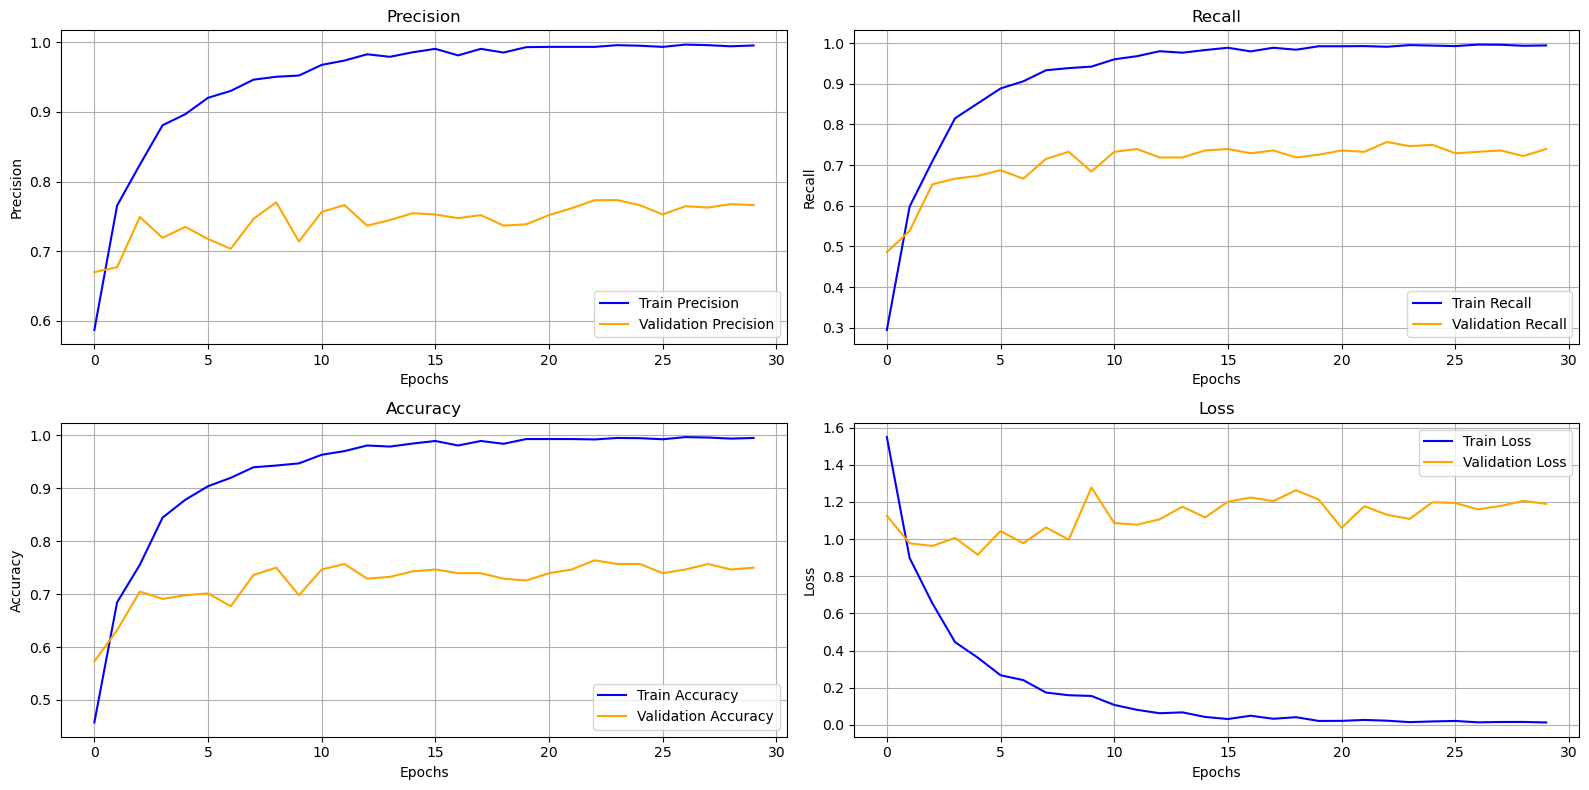

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the metrics
plt.figure(figsize=(16, 8))

# Line plots for precision, recall, accuracy, and loss
plt.subplot(2, 2, 1)
plt.plot(r.history['precision'], label='Train Precision', color='blue')
plt.plot(r.history['val_precision'], label='Validation Precision', color='orange')
plt.title('Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(r.history['recall'], label='Train Recall', color='blue')
plt.plot(r.history['val_recall'], label='Validation Recall', color='orange')
plt.title('Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(r.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(r.history['loss'], label='Train Loss', color='blue')
plt.plot(r.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Adjust layout and save/show the plot
plt.tight_layout()
plt.savefig('MetricsAndLossPlot30epoch.png')
plt.show()


In [27]:
from tensorflow.keras.models import load_model

model.save('model_best_F1score30epoch.h5')

In [28]:
y_pred = model.predict(test_set)

10/10 [==============================] - 10s 1s/step


In [29]:
y_pred

array([[4.2990318e-06, 9.5986164e-01, 3.7989810e-02, ..., 1.3260377e-03,
        1.8069592e-05, 7.8312255e-04],
       [3.7216708e-07, 9.9952292e-01, 2.1259291e-08, ..., 4.4500342e-04,
        1.4087353e-05, 2.2365281e-09],
       [6.8951076e-09, 1.0000000e+00, 5.1945271e-12, ..., 1.1900539e-10,
        1.3294927e-08, 3.9092196e-09],
       ...,
       [1.0055827e-02, 2.1754684e-01, 4.6689498e-01, ..., 1.6071841e-01,
        6.9188193e-04, 1.4407071e-01],
       [7.4108539e-11, 1.4490236e-08, 1.2846212e-06, ..., 5.3281592e-09,
        9.9999857e-01, 1.2739841e-07],
       [7.2539829e-06, 2.7955783e-05, 3.5140533e-07, ..., 6.1401727e-07,
        4.4785902e-02, 9.5517784e-01]], dtype=float32)

In [30]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [31]:
y_pred

array([1, 1, 1, 6, 4, 1, 6, 6, 1, 2, 0, 4, 1, 5, 6, 5, 6, 2, 6, 6, 6, 6,
       6, 1, 0, 1, 1, 1, 6, 1, 2, 6, 4, 1, 5, 5, 3, 5, 5, 6, 1, 1, 4, 4,
       0, 4, 0, 0, 6, 0, 6, 0, 6, 0, 5, 0, 5, 5, 0, 0, 6, 1, 1, 4, 2, 0,
       5, 5, 1, 4, 0, 4, 5, 1, 1, 0, 1, 5, 2, 0, 0, 1, 2, 6, 0, 0, 5, 0,
       6, 6, 0, 6, 0, 5, 2, 4, 5, 0, 1, 4, 4, 0, 1, 4, 4, 1, 0, 2, 1, 0,
       1, 1, 5, 0, 1, 4, 5, 6, 0, 1, 1, 6, 1, 4, 2, 1, 6, 4, 1, 0, 4, 5,
       0, 1, 6, 0, 1, 4, 1, 4, 4, 1, 1, 5, 4, 6, 6, 0, 0, 6, 4, 1, 0, 1,
       0, 0, 2, 4, 0, 6, 1, 2, 0, 2, 6, 5, 2, 6, 4, 5, 5, 6, 4, 6, 0, 1,
       5, 1, 6, 6, 6, 5, 4, 6, 2, 1, 0, 5, 6, 1, 4, 1, 4, 6, 2, 0, 1, 0,
       6, 5, 0, 1, 2, 1, 0, 0, 1, 5, 1, 4, 2, 6, 1, 0, 0, 4, 6, 4, 0, 1,
       1, 4, 6, 2, 1, 4, 3, 5, 6, 6, 5, 1, 0, 1, 1, 0, 1, 5, 0, 4, 6, 4,
       6, 5, 1, 6, 6, 1, 5, 1, 4, 4, 0, 4, 2, 5, 0, 0, 0, 4, 1, 1, 1, 2,
       1, 1, 6, 1, 1, 0, 5, 0, 1, 2, 1, 1, 0, 5, 6, 1, 1, 4, 4, 0, 0, 0,
       1, 0, 1, 4, 1, 1, 2, 1, 4, 0, 0, 2, 0, 2, 1,

In [32]:
import tensorflow as tf

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


In [33]:
class_names = list(training_set.class_indices.keys())
class_names

['Bacteria', 'Fungi', 'Healthy', 'Nematode', 'Pest', 'Phytopthora', 'Virus']

1/1 [==============================] - 1s 504ms/step


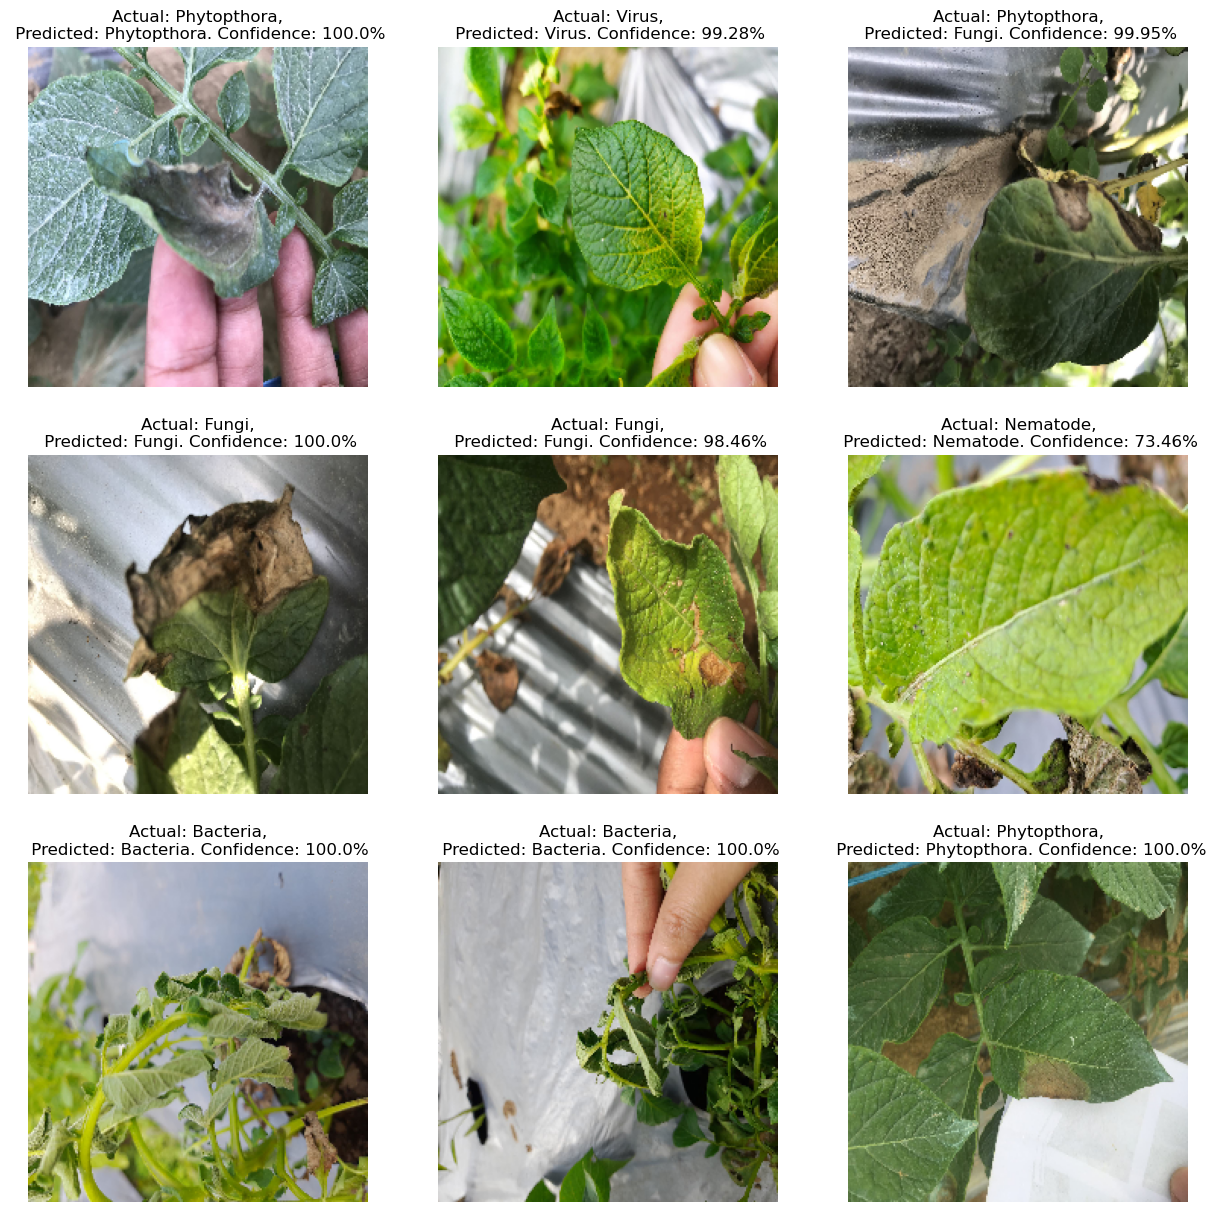

In [34]:
plt.figure(figsize=(15, 15))
for images, labels in test_set:
    predictions = model.predict(images)
    for i in range(min(len(images), 9)):  # Iterate over the images in the batch
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class_index = np.argmax(predictions[i])
        predicted_class = class_names[predicted_class_index]
        actual_class_index = np.argmax(labels[i])
        actual_class = class_names[actual_class_index]
        confidence = round(100 * predictions[i][predicted_class_index], 2)
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}. Confidence: {confidence}%")
        
        plt.axis("off")
    break
plt.show()
